In [1]:
import pandas as pd
from graficos import *
import numpy as np


In [2]:
df = pd.read_csv("C:/Users/shado/Desktop/Programación(python,mySQL)/python-notebooks/datos/salary_data_cleaned.csv")
df.head(10)

,Job Title,Company Name,Location,Salary Estimate,Rating,Job Description,size,founded,type,industry,...,java,javascript,sql,excel,spark,aws,azure,job_simp,seniority,desc len
0,"Data Scientist, Data Science & Modeling",CardWorks,"South Jordan, UT","$134,452 /yr (est.)",3.1,Merrick Bank employees share in our mission to...,501 to 1000 Employees,1987,Company - Private,Banking & Lending,...,0,0,0,0,0,0,0,data scientist,mid,936
1,Student Employee - Data Science,Electric Power Research Institute,"Charlotte, NC","$82,980 /yr (est.)",5.0,Job Title:\nStudent Employee - Data Science\nL...,Unknown,Company - Private,Unknown / Non-Applicable,NaN,...,0,0,0,0,0,0,0,data science,mid,639
2,Data Science Engineer,Dataquestcorp,"Branchburg, NJ","$75,000 /yr (est.)",NaN,We are providing free training and placement o...,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,data engineer,mid,282
3,Junior Data Scientist,Augray,"Brookfield, WI","$57,500 /yr (est.)",4.3,"Brookfield, WI, USA\nSummary:\nHiring Fresher ...",51 to 200 Employees,2014,Subsidiary or Business Segment,Information Technology Support Services,...,0,0,0,0,0,0,0,data scientist,jr,643
4,Data science instructor,MIM,Remote,"$131,513 /yr (est.)",NaN,ABOUT MIM\nMIM is a New York based institution...,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,data science,mid,570
5,Data Science Assistant,United Nations,"New York, NY","$88,585 /yr (est.)",4.0,This position is located in the Analytics Sect...,10000+ Employees,1945,Government,National Agencies,...,0,0,0,0,0,0,0,data science,mid,855
6,BHJOB15656_16794 - Data Scientist,Myticas Consulting,Remote,"$88,585 /yr (est.)",3.7,The recruitment team here at Myticas is lookin...,1 to 50 Employees,Company - Private,Information Technology Support Services,Information Technology,...,0,0,0,0,0,0,0,data scientist,mid,766
7,Data Engineer,eTeam Inc.,"Thomasville, GA","$91,760 /yr (est.)",4.4,Senior level with 6 9 years experience data en...,5001 to 10000 Employees,1999,Company - Private,Staffing & Subcontracting,...,0,0,1,0,0,0,0,data engineer,mid,283
8,Data Scientist (Junior),BDSA,"Louisville, CO","$100,000 /yr (est.)",1.5,Job Summary: The Analytics team empowers BDSA ...,Unknown,Company - Private,Advertising & Public Relations,Media & Communication,...,0,0,0,0,0,0,0,data scientist,mid,856
9,Jr. Data Scientist,Net2Aspire,Remote,"$72,500 /yr (est.)",NaN, Apply Statistical and Machine Learning metho...,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,data scientist,jr,730


In [3]:
# vemos la columa de job simp que contiene todos los puestos de trabajo que hay en el dataset y contamos la cantidad de vacantes para cada uno
df['job_simp'].value_counts()

data engineer     198
data scientist    157
data science       49
data analyst       21
data analytics     10
manager             7
mle                 4
analyst             2
na                  1
Name: job_simp, dtype: int64

In [4]:
# miramos cuantos valores hay por cada nivel requerido para las vacantes publicadas 
df.seniority.value_counts()

mid    415
jr      31
sr       3
Name: seniority, dtype: int64

In [5]:
# le echamos un vistaso a la columa que nos muestra el largo de las descripciones y contamos cuantos valores hay de cada uno.
df['desc len'].value_counts()

804     130
919       9
283       9
856       9
523       9
       ... 
654       1
611       1
1212      1
495       1
882       1
Name: desc len, Length: 134, dtype: int64

In [6]:
df.describe()

,Rating,yearly,salary,python,java,javascript,sql,excel,spark,aws,azure,desc len
count,377.000000,449.0,449.000000,449.000000,449.0,449.0,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,3.965782,2.0,104640.505568,0.120267,0.0,0.0,0.075724,0.042316,0.028953,0.015590,0.006682,902.002227
std,0.577662,0.0,35678.082938,0.325637,0.0,0.0,0.264851,0.201534,0.167862,0.124022,0.081558,662.747769
min,1.000000,2.0,46789.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,118.000000
25%,3.900000,2.0,90375.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,643.000000
50%,4.000000,2.0,90375.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,804.000000
75%,4.200000,2.0,113281.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,882.000000
max,5.000000,2.0,275000.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,7444.000000


### con los datos que tenemos que preguntas se harian?


-¿Existe alguna diferencia significativa entre el salario remoto y presencial?

-¿Qué estados tienen el mayor número de vacantes disponibles?

-¿Cuál es la habilidad más requerida en el área de data science?

-¿Existe alguna relación entre el rating de las empresas y el salario?



### Pregunta 1

In [7]:
# Obtenemos todos los trabajos que tienen una localización para trabajar remota y lo guardamos en una nueva columna
df['job_r_or_p'] = df['job_state'].apply(lambda x: "remoto" if x.lower() == "remote" else "presencial")
df['job_r_or_p'].value_counts()

presencial    359
remoto         90
Name: job_r_or_p, dtype: int64

In [8]:
"""una vez teniendo la columna de trabajos remotos o presenciales realizamos una comparación
como sabemos del previó análisis algunos titulos de los trabajos indican si es remoto,
entonces obtenemos el tipo de trabajo y los comparamos con la columna ya creada, si los tipos son iguales
se mantiene el valor, caso contrario significa que el tipo es remoto."""
df['job_r_or_p'].where(df['job_r_or_p'] == (df['Job Title'].apply(lambda x: "remoto" if "Remote" in x else "presencial")), 
    "remoto", 
    inplace=True)

In [9]:
# como podemos observar obtuvimos 15 valores nuevos para remoto
df['job_r_or_p'].value_counts()

presencial    344
remoto        105
Name: job_r_or_p, dtype: int64

In [10]:
# obtenemos una muestra de 105 trabajos presenciales y lo guardamos en una variable 
job_p = df[df['job_r_or_p'] == "presencial"].sample(n=105)

# creamos una variable que contiene todos los trabajos remotos
job_r = df[df['job_r_or_p'] == "remoto"]

In [11]:
# obtenemos por medio de la columna salary el promedio de los salarios estimados para cada tipo de trabajo (presencial y remoto)
print(f"Salario promedio por año: {job_p['salary'].mean(): .2f} USD. Trabajo presencial")
print(f"Salario promedio por año: {job_r['salary'].mean(): .2f} USD. Trabajo remoto")

Salario promedio por año:  100288.78 USD. Trabajo presencial
Salario promedio por año:  121911.88 USD. Trabajo remoto


In [12]:
# Creamos dos variables, las cuales utilizaremos para hacer un gráfico porcentual del promedio salarial de las dos modalidades de trabajo
salarys = [job_p['salary'].mean(), job_r['salary'].mean()]
types_job = ["Trabajo Presencial", "Trabajo Remoto"]

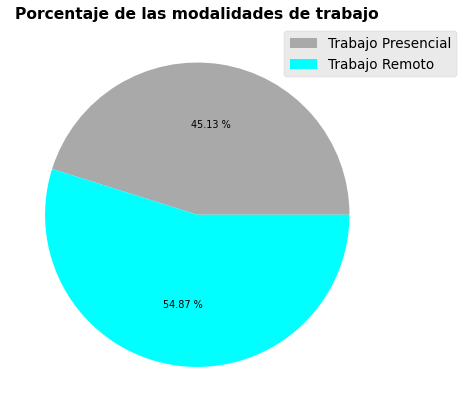

In [13]:
# Llamamos a la función que nos permite realizar un gráfico de pastel y pasamos sus parametros correspondientes
gPie(tLabels(titleText="Porcentaje de las modalidades de trabajo"), salarys, types_job)

Gracias a la anterior grafica podemos conocer que, si existe una diferencia significativa entre la ganancia promedio por año en dolares para las dos modalidades de trabajo.

Mirandose favoresida la modalidad **Remota** con un porcentaje de ganancia del **8.68%** mayor que la modalidad **Presencial**.

### Pregunta 2

In [14]:
# creamos una serie que contiene el número total de trabajos por estados
job_per_states = df['job_state'].value_counts()

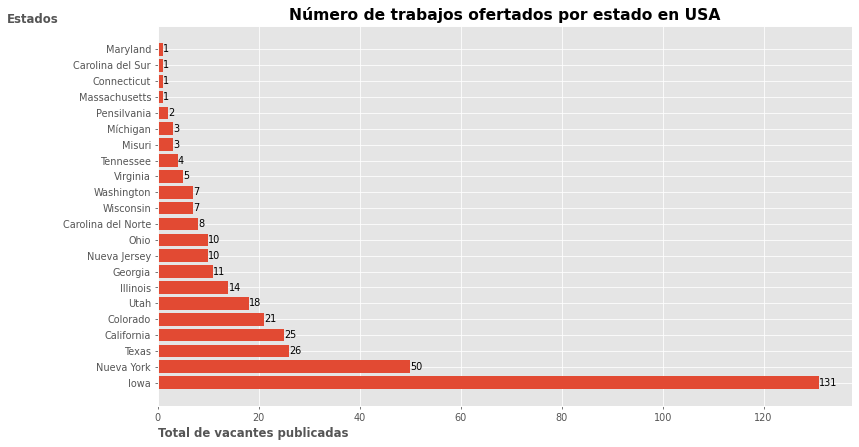

In [15]:
gBarH(tLabels(textX="Total de vacantes publicadas",
            textY="Estados",
            titleText="Número de trabajos ofertados por estado en USA"), 
    job_per_states[job_per_states.index != "Remote"])

De acuerdo con los datos de la gráfica, los estados con el mayor número de vacantes publicadas son **Iowa** y **Nueva York** con un total de 131 y 50 respectivamente.

### Pregunta 3

In [16]:
# creamos un diccionario vacío para almacenar los valores del siguiente ciclo for. 
skills_dict = {}
# creamos un ciclo para recorrer las las columnas del dataframe y obtener sus nombres
for x in df.loc[:,'python':'azure'].keys():
    try:
        # creamos una llave con el nombre de cada columna que obtenemos por cada iteración y
        skills_dict[x] = df[df[x] == 1][x].value_counts().item() # le asignamos el valor que obtenemos de contar el total de 1 que contiene cada columna
    except:
        # en caso de que la columna no contenga ningun 1 salta la excepción y le asigamos manualmente un 0
        skills_dict[x] = np.nan

# convertimos el diccionario que obtuvimos en una serie de pandas para un manejo más optimo
skills_count = pd.Series(skills_dict).dropna().astype(int)

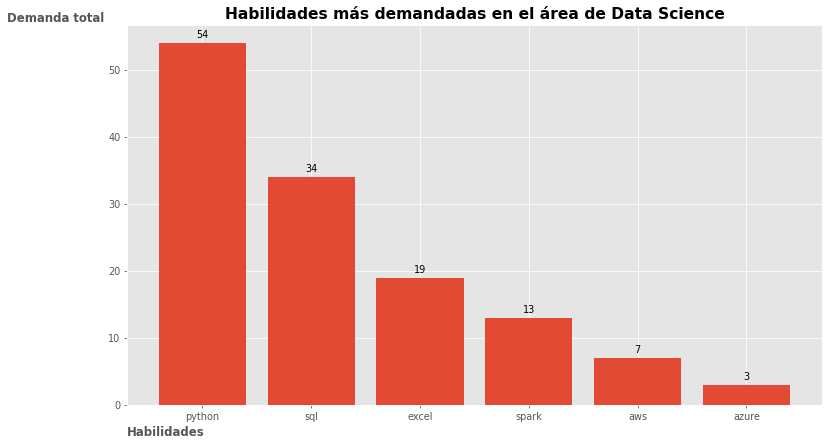

In [17]:
gBar(tLabels(textX="Habilidades",
            textY="Demanda total",
            titleText="Habilidades más demandadas en el área de Data Science"),
    skills_count)

Como podemos observar de la grafica **Python** es una de las habilidades más demandadas en el área de data science y sus ramas y la que se posiciona en primer lugar actualmente.

### Pregunta 4

In [18]:
# obtenemos los indices de todos los valores nulos en la columna de rating y los asignamos a una variable 
drop_i = df[df.Rating.isna()].index

# utilizando la función drop le pasamos la lista de indices que obtuvimos y eliminamos esos registros. 
# Creamos un nuevo dataframe con los datos obtenidos
df_ratin = df.drop(drop_i)

In [19]:
print(f"La correlación de pearson entre las columnas rating y salary es: {df_ratin.Rating.corr(df_ratin.salary, method='pearson'): .2f}")

La correlación de pearson entre las columnas rating y salary es: -0.17


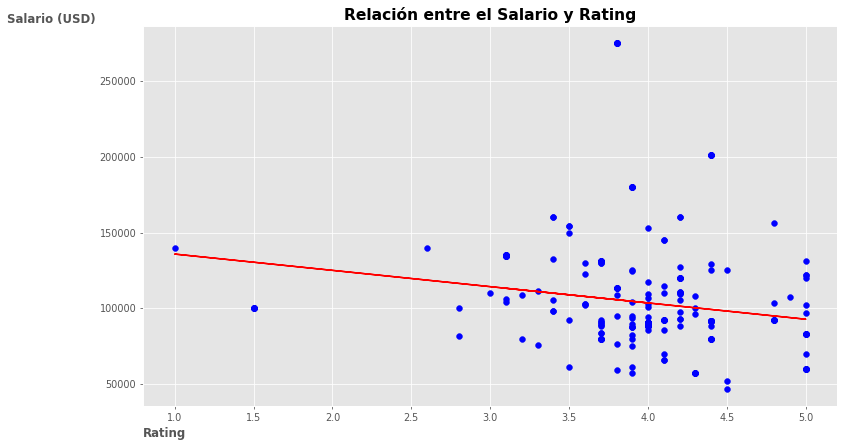

In [20]:
# Realizamos un gráfico de dispersión con las variables de rating y salario, y le gráficamos su regresión lineal 
scatterReg(tLabels(textX="Rating", 
                    textY="Salario (USD)", 
                    titleText="Relación entre el Salario y Rating"), 
            dataframe=df_ratin)

Como podemos observar del calculo obtenido de **-0.17** y el diagrama de dispersión, existe una ligera anticorrelación entre el salario por año y el rating, esto es, a mayor rating, menor salario.